# Exercise 5

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np

In [2]:
tokenizer = Tokenizer()

data = open('sonnets.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

1. Create the LSTM model

In [13]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 10, 64)            216000    
                                                                 
 bidirectional_5 (Bidirecti  (None, 10, 512)           657408    
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 10, 512)           0         
                                                                 
 lstm_11 (LSTM)              (None, 128)               328192    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 3375)              219375    
                                                      

In [14]:
 history = model.fit(predictors, label, epochs=300, verbose=1)

Epoch 1/300
484/484 [==============================] - 16s 22ms/step - loss: 7.0776 - accuracy: 0.0206
Epoch 2/300
484/484 [==============================] - 6s 12ms/step - loss: 6.6053 - accuracy: 0.0214
Epoch 3/300
484/484 [==============================] - 6s 13ms/step - loss: 6.4952 - accuracy: 0.0212
Epoch 4/300
484/484 [==============================] - 6s 11ms/step - loss: 6.4405 - accuracy: 0.0222
Epoch 5/300
484/484 [==============================] - 8s 16ms/step - loss: 6.3966 - accuracy: 0.0278
Epoch 6/300
484/484 [==============================] - 5s 10ms/step - loss: 6.3354 - accuracy: 0.0338
Epoch 7/300
484/484 [==============================] - 6s 12ms/step - loss: 6.2799 - accuracy: 0.0350
Epoch 8/300
484/484 [==============================] - 5s 10ms/step - loss: 6.2274 - accuracy: 0.0377
Epoch 9/300
484/484 [==============================] - 5s 11ms/step - loss: 6.1837 - accuracy: 0.0390
Epoch 10/300
484/484 [==============================] - 5s 11ms/step - loss: 6.14

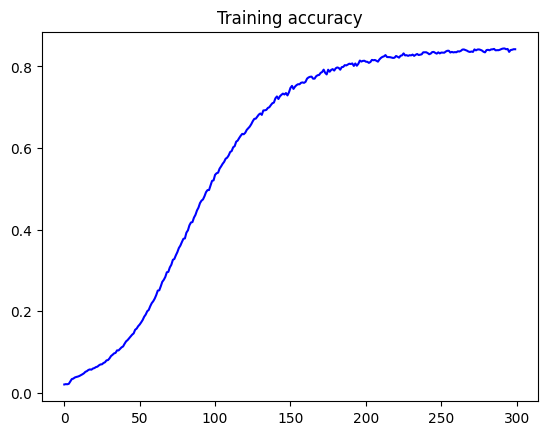

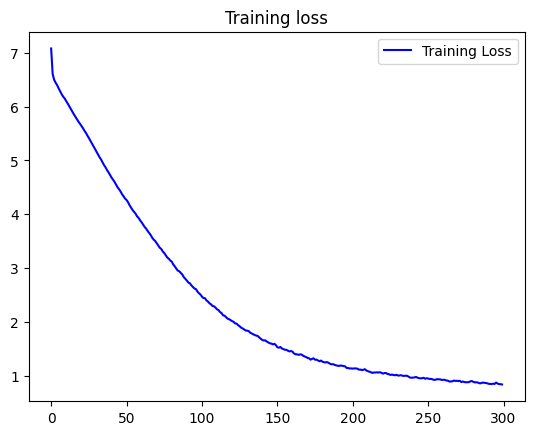

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [23]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 27ms/step
Help me Obi Wan Kenobi, you're my only hope to lip of life to any end of leave me he removed such feast with thy sight would come slain come greater needing self night happy hours well remain knows thee old show crime his side hand grow rage of this ill ill bright did virtuous hand grow virtuous burn errors stand thee ' which write of i find it still be out ere nature shall seen choose more near slain seen hand choose grow sit song hate prove you new tell me are you shine leave love's love so cure of laws the map of brow green ornament more
